# Practice Notebook for Stackoverflow Survey

In [1]:
# !pip install opendatasets
# !pip install pandas


In [2]:
import opendatasets as od

#from https://github.com/JovianML/opendatasets

In [3]:
# help(od)

In [4]:
# od.download('stackoverflow-developer-survey-2020')

# # Covid-19 Stats by Our World in Data (https://github.com/owid/covid-19-data/tree/master/public/data):
# od.download('owid-covid-19-latest')

In [5]:
import os

In [6]:
os.listdir('stackoverflow-developer-survey-2020')

['survey_results_public.csv', 'survey_results_schema.csv', 'README.txt']

In [7]:
import pandas as pd

In [8]:
survey_raw_df = pd.read_csv('stackoverflow-developer-survey-2020/survey_results_public.csv')

In [9]:
survey_raw_df.sample(5)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
52903,53990,I am a developer by profession,Yes,NaN,21,NaN,NaN,NaN,United States,United States dollar,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",NaN,NaN,Just as welcome now as I felt last year,40.0,9,4
5982,6006,I am a developer by profession,Yes,32.0,18,Yearly,3500000.0,48866.0,India,Indian rupee,...,Easy,Too long,No,Web development or web design,NaN,Angular;Angular.js;Express;Flask;jQuery;React....,Somewhat less welcome now than last year,NaN,9,9
48822,49833,I am a developer by profession,Yes,24.0,13,Yearly,79000.0,50473.0,New Zealand,New Zealand dollar,...,Easy,Appropriate in length,No,"Another engineering discipline (such as civil,...",ASP.NET Core;React.js;Vue.js,Flask;React.js,Just as welcome now as I felt last year,36.0,12,2
61807,63079,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,United Kingdom,NaN,...,NaN,NaN,NaN,NaN,Express;React.js,Angular;Express;React.js;Symfony,Just as welcome now as I felt last year,NaN,NaN,NaN
15859,15914,"I am not primarily a developer, but I write co...",Yes,32.0,11,Monthly,9500.0,147360.0,United Kingdom,Pound sterling,...,Easy,Appropriate in length,No,"Information systems, information technology, o...",Django;Flask,Django;Flask,A lot less welcome now than last year,35.0,15,8


In [10]:
survey_results_schema_df = pd.read_csv('stackoverflow-developer-survey-2020/survey_results_schema.csv', index_col='Column')

In [27]:
survey_results_schema_df.loc['Age']

QuestionText    What is your age (in years)? If you prefer not...
Name: Age, dtype: object

In [28]:
survey_results_schema_df.QuestionText

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [29]:
# Make series from Schema df:
 
schema_raw = survey_results_schema_df.QuestionText

In [30]:
schema_raw['Age1stCode']

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'

In [32]:
# Install the Jovian library
!pip install jovian --upgrade --quiet
import jovian

<IPython.core.display.Javascript object>

In [34]:
filename = 'practice-stackoverflow-survey.ipynb'
jovian.commit(filename=filename)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: [jovian] Updating notebook "aleksmn/practice-stackoverflow-survey" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Error: Failed to read Anaconda environment using command: "conda env export -n base --no-builds"
[jovian] Committed successfully! https://jovian.ai/aleksmn/practice-stackoverflow-survey


'https://jovian.ai/aleksmn/practice-stackoverflow-survey'

## Data Preparation & Cleaning


In [52]:
len(survey_raw_df.columns)

61

In [49]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [53]:
len(selected_columns)

20

In [54]:
survey_df = survey_raw_df[selected_columns].copy()

In [55]:
survey_df.shape

(64461, 20)

In [57]:
schema = schema_raw[selected_columns]

In [58]:
schema['YearsCode']

'Including any education, how many years have you been coding in total?'

In [60]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [62]:
survey_df.describe()

,Age,WorkWeekHrs
count,45446.000000,41151.000000
mean,30.834111,40.782174
std,9.585392,17.816383
min,1.000000,1.000000
25%,24.000000,40.000000
50%,29.000000,40.000000
75%,35.000000,44.000000
max,279.000000,475.000000


In [66]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

In [68]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)


In [69]:
survey_df.describe()

,Age,WorkWeekHrs
count,45319.000000,41002.000000
mean,30.832322,40.024395
std,9.505965,10.630010
min,10.000000,1.000000
25%,24.000000,40.000000
50%,29.000000,40.000000
75%,35.000000,43.000000
max,99.000000,140.000000


In [71]:
survey_df.Gender.value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [72]:
import numpy as np

In [73]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [74]:
survey_df.Gender.value_counts()

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

## Exploratory Analysis and Visualization


In [81]:
# !pip install seaborn matplotlib
# !pip install matplotlib

In [82]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [83]:
survey_df.Country.unique()

array(['Germany', 'United Kingdom', 'Russian Federation', 'Albania',
       'United States', 'India', 'Tunisia', 'Spain', 'Netherlands',
       'France', 'Belgium', 'Portugal', 'Canada', 'China', 'Ukraine',
       'Italy', 'Brazil', 'Austria', 'Mexico', 'Sweden', 'Poland',
       'Indonesia', 'Greece', 'Israel', 'Czech Republic', nan,
       'Bosnia and Herzegovina', 'Bulgaria', 'Serbia', 'Switzerland',
       'Hungary', 'Nepal', 'Slovenia', 'Uruguay', 'Denmark', 'Pakistan',
       'Taiwan', 'Romania', 'Finland', 'Costa Rica', 'Nigeria', 'Chile',
       'Turkey', 'Panama', 'Ireland', 'Estonia', 'Philippines',
       'Australia', 'Nomadic', 'Peru', 'Cyprus', 'Sri Lanka', 'Kenya',
       'Norway', 'Iran', 'Croatia', 'Egypt', 'Argentina', 'Ghana',
       'Latvia', 'Morocco', 'Bangladesh', 'Ecuador', 'Haiti',
       'Venezuela, Bolivarian Republic of...', 'Colombia', 'Lithuania',
       'El Salvador', 'Honduras', 'Ethiopia', 'Lebanon', 'Uganda',
       'Algeria', 'Viet Nam', 'Guatemala', '

In [84]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

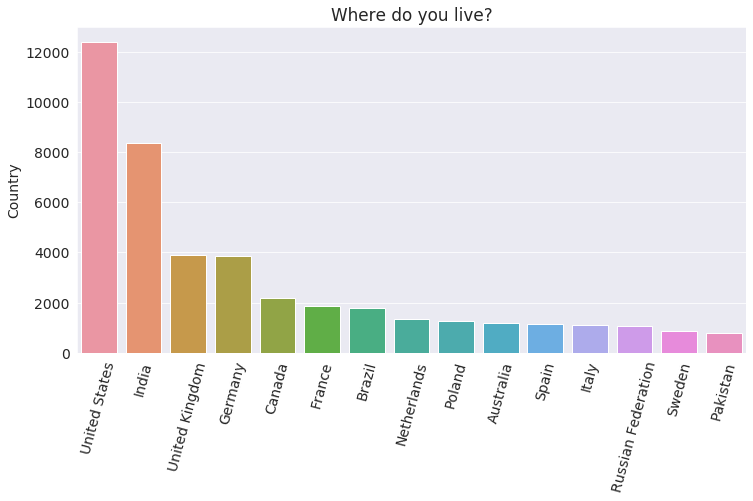

In [109]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries);

### Age

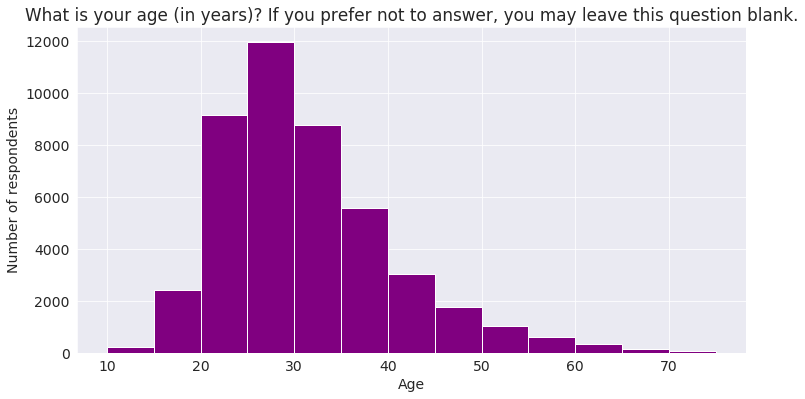

In [129]:
plt.figure(figsize=(12, 6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')


plt.hist(x=survey_df.Age, bins=np.arange(10,80,5), color='purple');

## Analysis go age groups

Create a new column called AgeGroup containing values like Less than 10 years, 10-18 years, 18-30 years, 30-45 years, 45-60 years and Older than 60 years.

In [135]:
survey_df['AgeGroup'] = 'None'

In [158]:
survey_df.loc[survey_df.Age < 10, 'AgeGroup'] = 'Less than 10 years'
survey_df.loc[(survey_df.Age >= 10) & (survey_df.Age < 18), 'AgeGroup'] = '10-17 years'
survey_df.loc[(survey_df.Age >= 18) & (survey_df.Age < 30), 'AgeGroup'] = '18-29 years'
survey_df.loc[(survey_df.Age >= 30) & (survey_df.Age < 45), 'AgeGroup'] = '30-44 years'
survey_df.loc[(survey_df.Age >= 45) & (survey_df.Age <= 60), 'AgeGroup'] = '45-60 years'
survey_df.loc[(survey_df.Age >= 45) & (survey_df.Age <= 60), 'AgeGroup'] = 'Older than 60 years'



In [167]:
survey_df[['Age', 'AgeGroup']].sample(10)

,Age,AgeGroup
33872,63.0,None
12761,23.0,18-29 years
17831,NaN,None
16253,33.0,30-44 years
26592,26.0,18-29 years
1671,38.0,30-44 years
60003,NaN,None
4186,29.0,18-29 years
53734,NaN,None
41518,NaN,None


In [169]:
agegroup_30_44_df = survey_df[survey_df.AgeGroup == "30-44 years"]

In [171]:
agegroup_30_44_df.describe()

,Age,WorkWeekHrs
count,17352.000000,15612.000000
mean,35.089759,40.636039
std,4.006418,8.944254
min,30.000000,2.000000
25%,32.000000,40.000000
50%,34.000000,40.000000
75%,38.000000,42.000000
max,44.000000,140.000000


In [173]:
# agegroup_30_44_df

In [175]:
gender_counts = agegroup_30_44_df.Gender.value_counts()
gender_counts


Man                                                  15839
Woman                                                 1165
Non-binary, genderqueer, or gender non-conforming       96
Name: Gender, dtype: int64

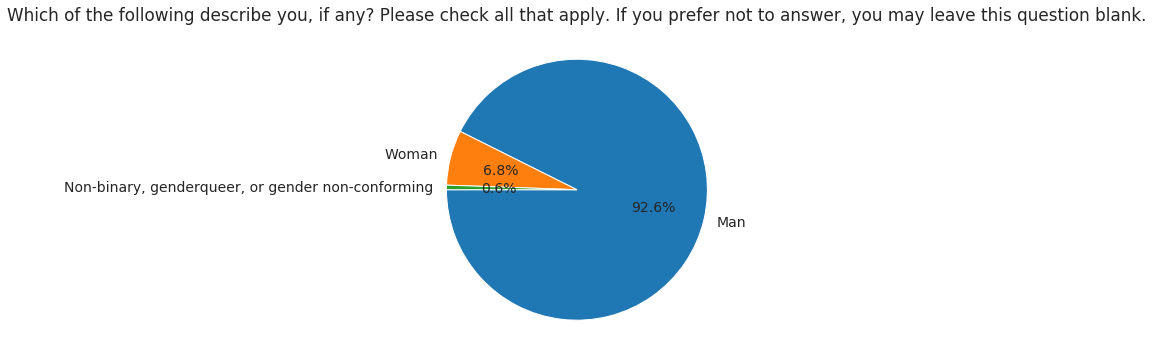

In [176]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

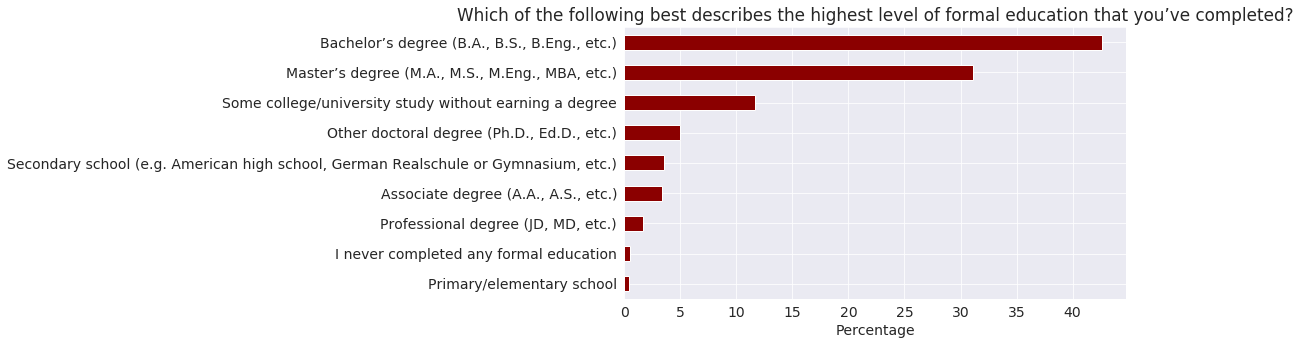

In [199]:
(agegroup_30_44_df.EdLevel.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='darkred')
plt.title(schema['EdLevel'])
plt.xlabel('Percentage');


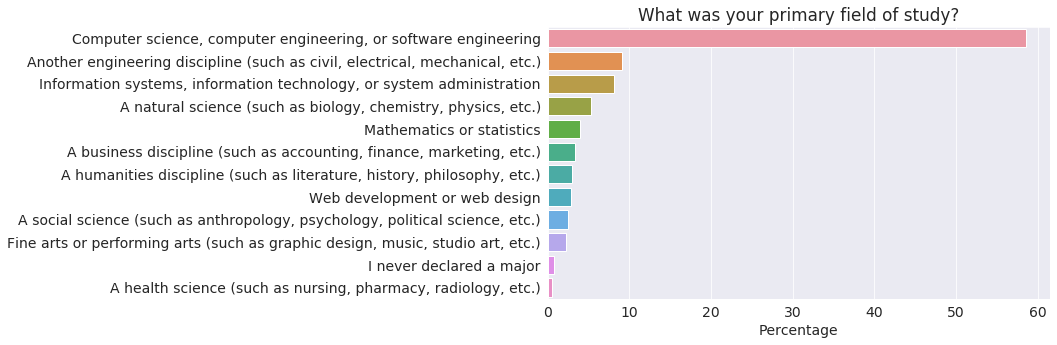

In [179]:
undergrad_pct = agegroup_30_44_df.UndergradMajor.value_counts() * 100 / agegroup_30_44_df.UndergradMajor.count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index)

plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Percentage');

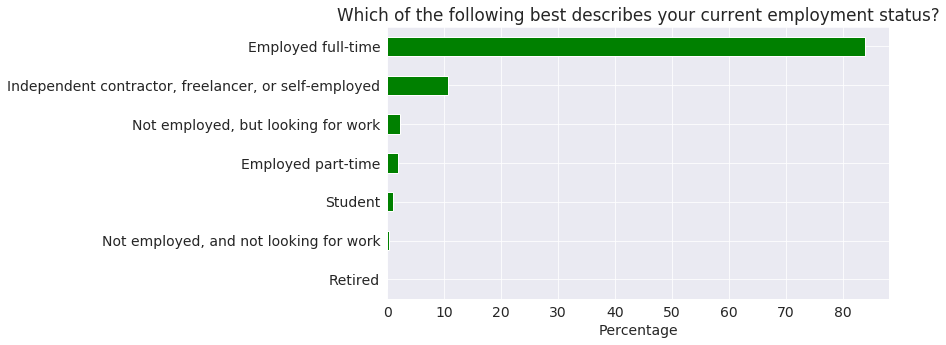

In [184]:
(agegroup_30_44_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.Employment)
plt.xlabel('Percentage');